In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv', sep=',')
train.set_index('PassengerId', inplace=True, drop=True)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [2]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target
X, y = parse_model_0(train.copy())
X.head()

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0


In [3]:
from sklearn.model_selection import cross_val_score
from statistics import mean
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return mean(xval)

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
compute_score(lr, X, y)

0.674548857768335

In [5]:
survived = train[train.Survived==1]
dead = train[train.Survived==0]

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(feature, bins = 20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Died", "Survived"], bins=bins)
    plt.legend(loc = "upper left")
    plt.title("Relative distribution of %s" % feature)
    plt.show()

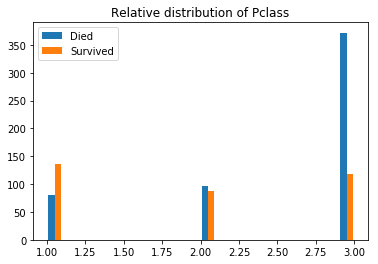

In [7]:
plot_hist('Pclass')

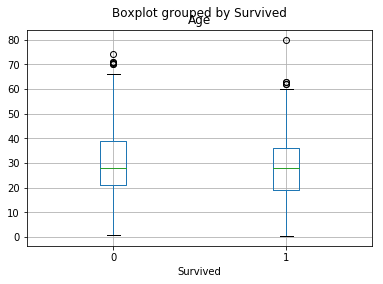

In [8]:
train.boxplot('Age', by="Survived")

In [9]:
def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'], prefix='split_Pclass')
    X = X.join(class_dummies)
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex', 'Pclass']
    for col in to_del: del X[col]
    return X, target
X, y = parse_model_1(train.copy())
X.head()

,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3
PassengerId,,,,,,
1,1,0,7.2500,0,0,1
2,1,0,71.2833,1,0,0
3,0,0,7.9250,0,0,1
4,1,0,53.1000,1,0,0
5,0,0,8.0500,0,0,1


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)
lr.coef_

array([[-0.150896  ,  0.23357229,  0.00669907,  0.3730938 ,  0.100852  ,
        -0.85258357]])

In [11]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix='split_' + dum)
        for col in split_temp:
            X[col] = split_temp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    to_del = ['Name', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del: del X[col]
    return X, target
X, y = parse_model_2(train.copy())
compute_score(LogisticRegression(solver='liblinear'), X, y)

0.7868160254657532

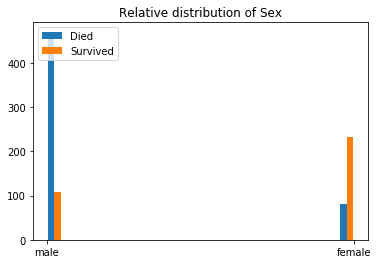

In [12]:
plot_hist('Sex')

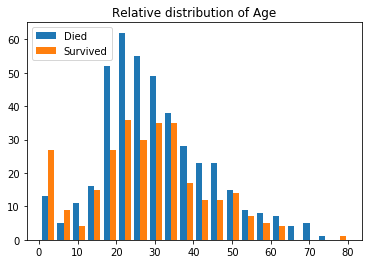

In [13]:
plot_hist('Age')

In [14]:
X['is_child'] = X.Age < 8
compute_score(LogisticRegression(solver='liblinear'), X, y)

0.800274134181057